<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SN           800 non-null    int64 
 1   Name         800 non-null    object
 2   Type 1       800 non-null    object
 3   Type 2       414 non-null    object
 4   HP           800 non-null    int64 
 5   Attack       800 non-null    int64 
 6   Defense      800 non-null    int64 
 7   Sp. Attack   800 non-null    int64 
 8   Sp. Defense  800 non-null    int64 
 9   Speed        800 non-null    int64 
 10  Generation   800 non-null    int64 
 11  Legendary    800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB
None
               SN          HP      Attack     Defense  Sp. Attack  \
count  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750   69.258750   79.001250   73.842500   72.820000   
std    208.343798   25.534669   32.457366   31.18

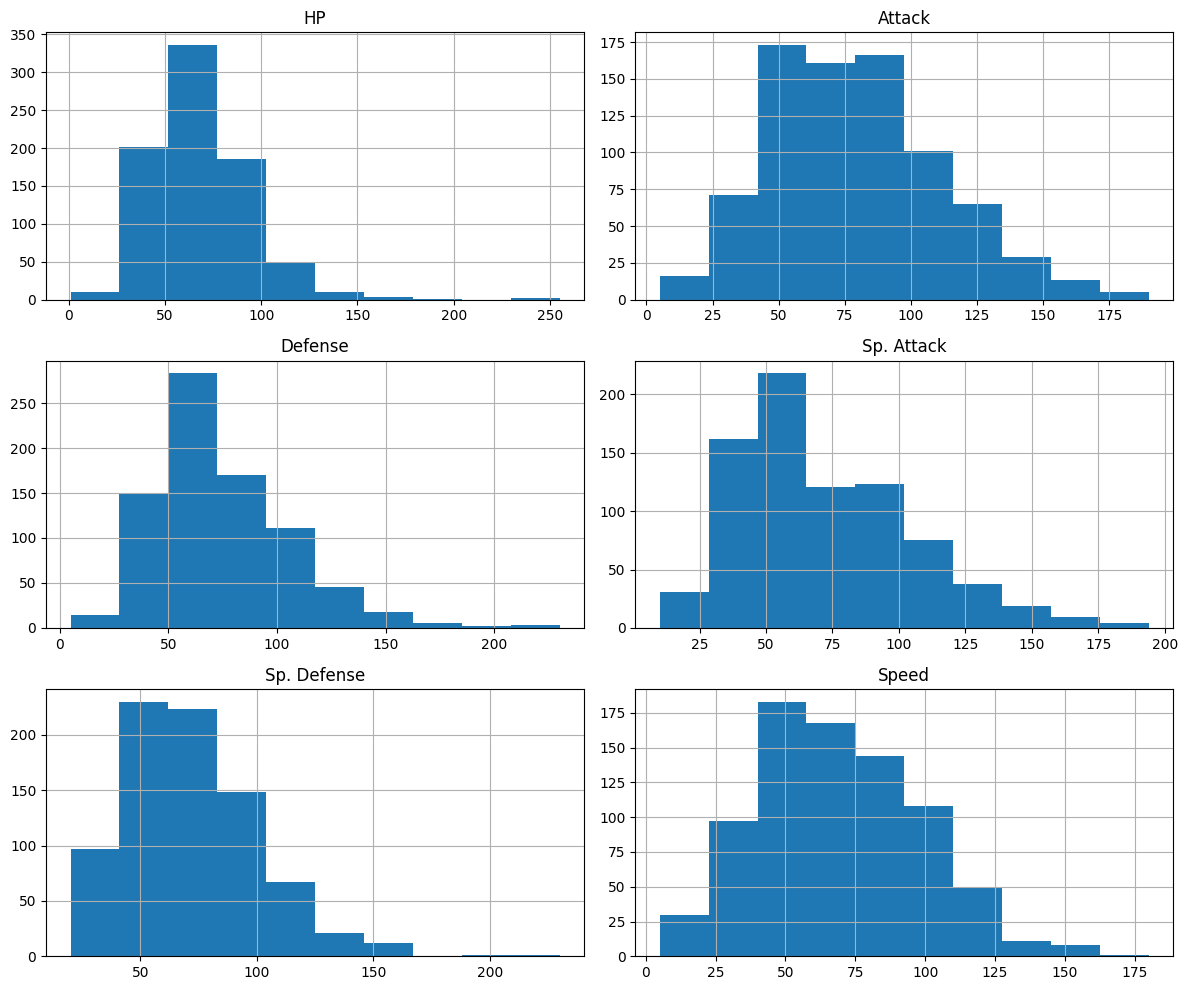

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64
Legendary
False    735
True      65
Name: count, dtype: int64


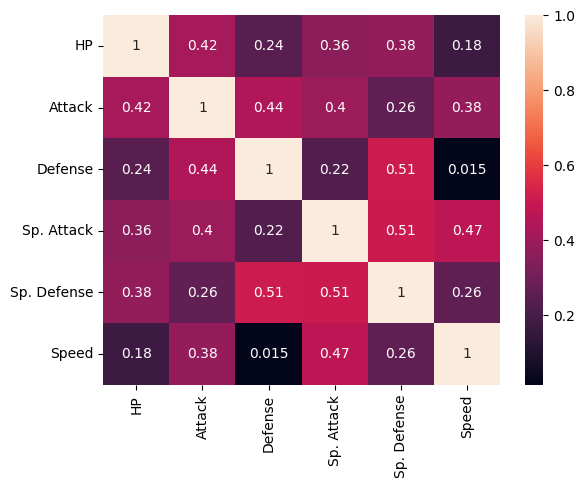

In [13]:
#Exploratory Data Analysis (EDA) on Pokemon Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Pokemon.csv')

# Basic info
print(df.info())
print(df.describe())
print(df.head())

# Missing values
print(df.isnull().sum())

# Distribution of numerical features including Sp. Attack and Sp. Defense
df[['HP', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed']].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Categorical feature counts
print(df['Type 1'].value_counts())
print(df['Legendary'].value_counts())

# Correlation heatmap
sns.heatmap(df[['HP', 'Attack', 'Defense', 'Sp. Attack', 'Sp. Defense', 'Speed']].corr(), annot=True)
plt.show()

# Insights:
# 1. Most Pokemon are not Legendary.
# 2. 'Attack' and 'Defense' have moderate correlation.
# 3. 'Type 1' distribution is uneven (some types are rare).
# 4. Some Pokemon have missing 'Type 2'.

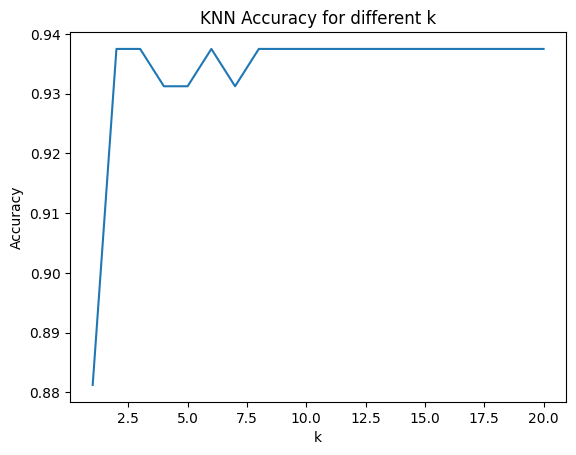

Optimal k: 2


In [14]:
# k-Nearest Neighbors (k-NN) Classification to predict Legendary status
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Prepare data
df['Legendary'] = df['Legendary'].astype(str).str.strip().str.upper()
y = df['Legendary'].map({'TRUE': 1, 'FALSE': 0})

# Drop rows where y is NaN
X = df[['Attack', 'Defense']]
mask = ~y.isna()
X = X[mask]
y = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find optimal k
accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    accuracies.append(acc)
plt.plot(range(1, 21), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different k')
plt.show()

optimal_k = accuracies.index(max(accuracies)) + 1
print("Optimal k:", optimal_k)

In [15]:
# Random Forest Classifier Implementation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Basic Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9375


In [16]:
# Hyperparameter Tuning with Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
rf_grid.fit(X_train, y_train)
print("Best Random Forest Params:", rf_grid.best_params_)
y_pred_rf_tuned = rf_grid.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))

Best Random Forest Params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Tuned Random Forest Accuracy: 0.93125


In [17]:
# Confusion Matrices for Model Comparison
from sklearn.metrics import confusion_matrix

# KNN (using optimal_k from previous cell)
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Tuned Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_tuned))

KNN Confusion Matrix:
 [[150   0]
 [ 10   0]]
Random Forest Confusion Matrix:
 [[148   2]
 [  8   2]]
Tuned Random Forest Confusion Matrix:
 [[149   1]
 [ 10   0]]


In [19]:
#Evaluation Metrics
from sklearn.metrics import confusion_matrix, classification_report

# KNN (using optimal_k from previous cell)
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Optionally, print classification reports for more detailed metrics
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Tuned Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf_tuned))


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       150
           1       0.00      0.00      0.00        10

    accuracy                           0.94       160
   macro avg       0.47      0.50      0.48       160
weighted avg       0.88      0.94      0.91       160

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       150
           1       0.50      0.20      0.29        10

    accuracy                           0.94       160
   macro avg       0.72      0.59      0.63       160
weighted avg       0.92      0.94      0.92       160

Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       150
           1       0.00      0.00      0.00        10

    accuracy                           0.93       160
   macro avg     

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag